<a href="https://colab.research.google.com/github/crediblebilal/ML-Google-Colab-Notebooks/blob/main/image_classification_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow Tutorial Link:https://www.tensorflow.org/tutorials/images/classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 3s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
print(type(data_dir), data_dir)

<class 'pathlib.PosixPath'> /root/.keras/datasets/flower_photos


<class 'list'> 641 <class 'pathlib.PosixPath'> /root/.keras/datasets/flower_photos/roses/6209630964_e8de48fe04_m.jpg


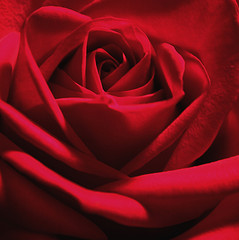

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(type(roses), len(roses), type(roses[0]), roses[0])
PIL.Image.open(str(roses[0]))

In [ ]:
print(str(roses[0]))

/root/.keras/datasets/flower_photos/roses/6209630964_e8de48fe04_m.jpg


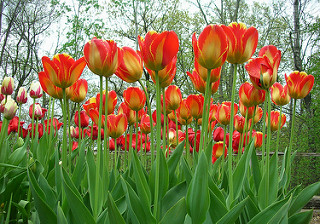

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
type(val_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

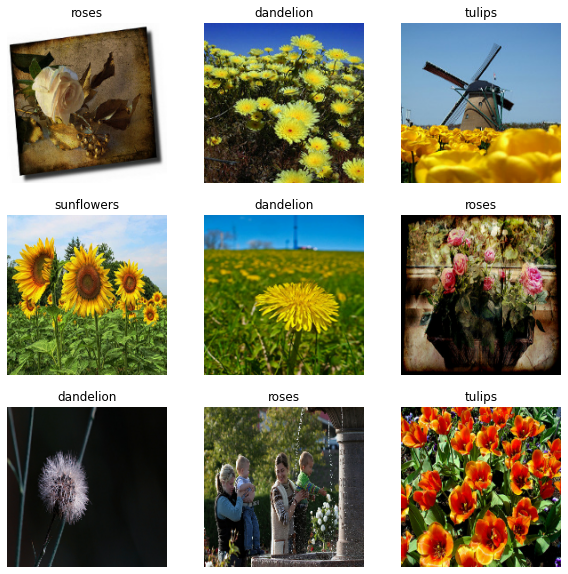

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 5

model = keras.models.Sequential([
  keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 39s 59ms/step - loss: 1.3296 - accuracy: 0.4315 - val_loss: 1.0547 - val_accuracy: 0.5954
Epoch 2/10
92/92 [==============================] - 4s 40ms/step - loss: 0.9805 - accuracy: 0.6178 - val_loss: 1.0575 - val_accuracy: 0.5981
Epoch 3/10
92/92 [==============================] - 4s 40ms/step - loss: 0.8078 - accuracy: 0.6856 - val_loss: 1.0428 - val_accuracy: 0.6322
Epoch 4/10
92/92 [==============================] - 4s 40ms/step - loss: 0.5975 - accuracy: 0.7779 - val_loss: 0.9476 - val_accuracy: 0.6540
Epoch 5/10
92/92 [==============================] - 4s 41ms/step - loss: 0.3849 - accuracy: 0.8675 - val_loss: 1.0034 - val_accuracy: 0.6471
Epoch 6/10
92/92 [==============================] - 4s 41ms/step - loss: 0.2198 - accuracy: 0.9298 - val_loss: 1.2593 - val_accuracy: 0.6458
Epoch 7/10
92/92 [==============================] - 4s 41ms/step - loss: 0.1309 - accuracy: 0.9612 - val_loss: 1.3650 - val_accuracy: 0.6253
Epoch 8/10
9

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

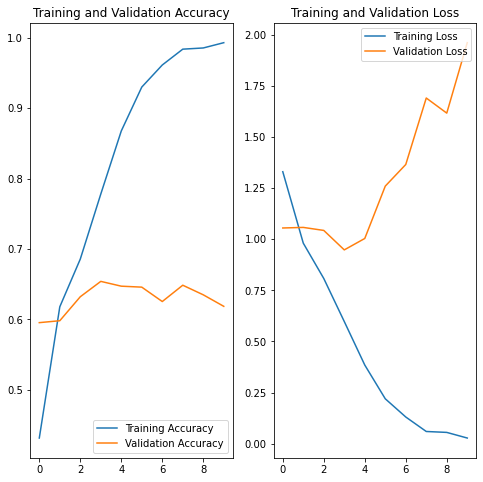

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
print(type(data_augmentation))

<class 'keras.engine.sequential.Sequential'>


<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'> 32
<class 'tensorflow.python.framework.ops.EagerTensor'> 32
<class 'tensorflow.python.framework.ops.EagerTensor'> 32
<class 'tensorflow.python.framework.ops.EagerTensor'> 32
<class 'tensorflow.python.framework.ops.EagerTensor'> 32
<class 'tensorflow.python.framework.ops.EagerTensor'> 32


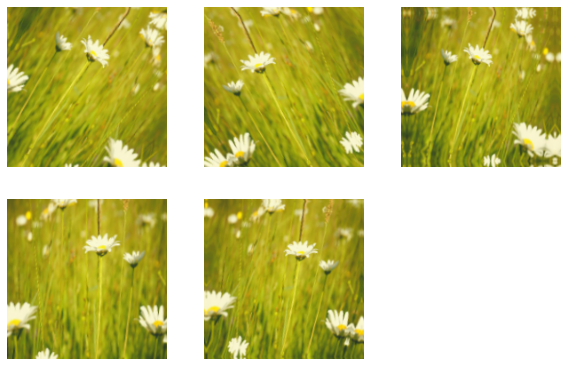

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    print(type(images),type(images[0]), len(images))
    for i in range(5):
        augmented_images = data_augmentation(images)
        print(type(augmented_images), len(augmented_images))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Augmented



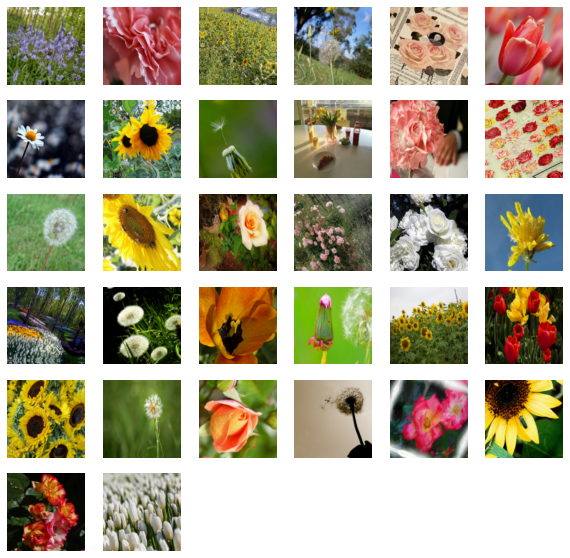

Original



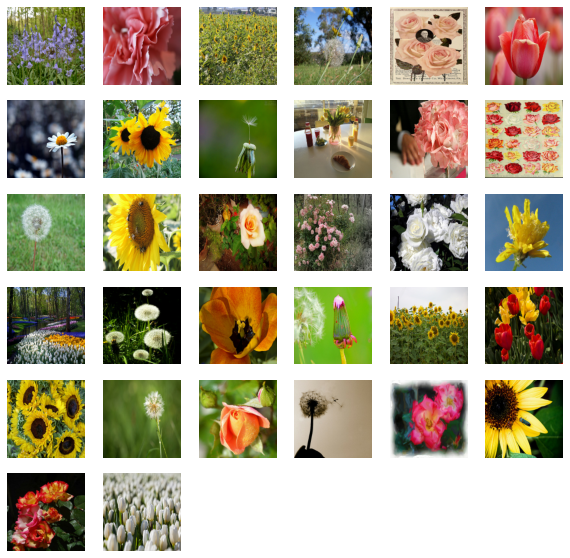

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    augmented_images = data_augmentation(images)
    print("Augmented\n")
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()
    print("Original\n")
    plt.figure(figsize=(10, 10))
    for i in range(32):
        ap = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()


In [ ]:
model = keras.models.Sequential([
  data_augmentation,
  keras.layers.experimental.preprocessing.Rescaling(1./255),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 6s 50ms/step - loss: 1.3024 - accuracy: 0.4349 - val_loss: 1.0449 - val_accuracy: 0.5913
Epoch 2/15
92/92 [==============================] - 4s 48ms/step - loss: 1.0426 - accuracy: 0.5906 - val_loss: 0.9778 - val_accuracy: 0.6131
Epoch 3/15
92/92 [==============================] - 4s 47ms/step - loss: 0.9718 - accuracy: 0.6216 - val_loss: 0.9367 - val_accuracy: 0.6431
Epoch 4/15
92/92 [==============================] - 4s 47ms/step - loss: 0.8943 - accuracy: 0.6628 - val_loss: 0.9714 - val_accuracy: 0.6281
Epoch 5/15
92/92 [==============================] - 4s 47ms/step - loss: 0.8304 - accuracy: 0.6870 - val_loss: 0.8558 - val_accuracy: 0.6649
Epoch 6/15
92/92 [==============================] - 4s 47ms/step - loss: 0.7933 - accuracy: 0.6979 - val_loss: 0.8483 - val_accuracy: 0.6717
Epoch 7/15
92/92 [==============================] - 4s 47ms/step - loss: 0.7662 - accuracy: 0.6986 - val_loss: 0.7588 - val_accuracy: 0.7180
Epoch 8/15
92

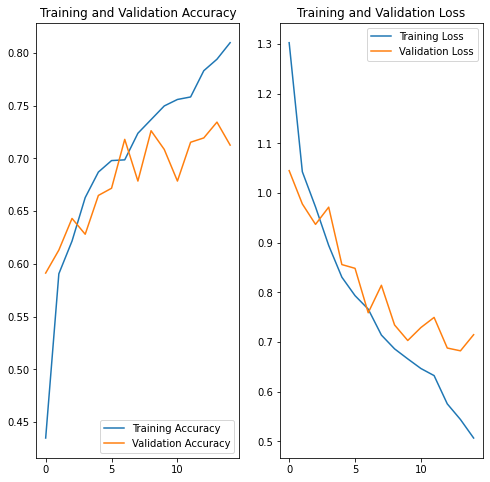

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"


131072/117948 [=================================] - 0s 0us/step


In [ ]:
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

In [ ]:
print(type(sunflower_path), sunflower_path)

<class 'str'> /root/.keras/datasets/Red_sunflower


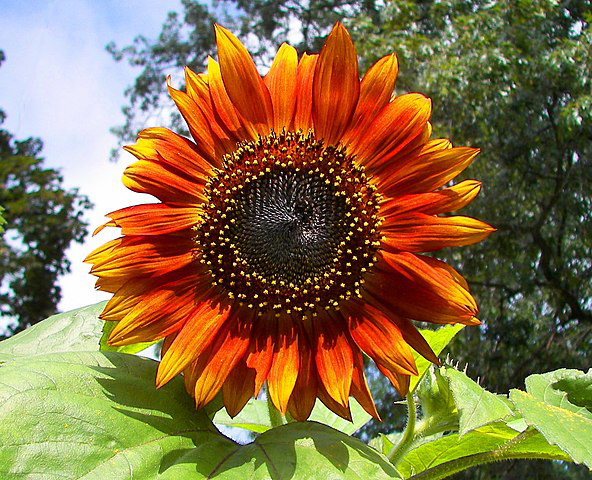

In [ ]:
PIL.Image.open(sunflower_path)

In [ ]:
img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)

In [ ]:
print(type(img))

<class 'PIL.Image.Image'>


In [ ]:
img_array = keras.preprocessing.image.img_to_array(img)

<class 'numpy.ndarray'> (180, 180, 3)


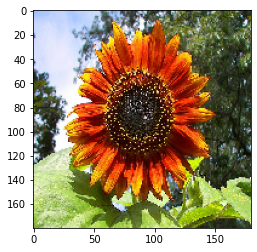

In [ ]:
print(type(img_array), img_array.shape)
plt.imshow(img_array.astype('uint8'))

In [ ]:
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array.shape)

(1, 180, 180, 3)


In [ ]:
predictions = model.predict(img_array)

In [ ]:
print(type(predictions), predictions.shape, predictions)

<class 'numpy.ndarray'> (1, 5) [[-5.8170357 -2.5231593 -1.5188076  6.0481725  1.1077448]]


In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
print(type(score), score.shape, score)

<class 'tensorflow.python.framework.ops.EagerTensor'> (5,) tf.Tensor([6.9759494e-06 1.8798161e-04 5.1321549e-04 9.9219620e-01 7.0957295e-03], shape=(5,), dtype=float32)


In [ ]:
np.max(score)

0.9921962

In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflowers with a 99.22 percent confidence.


In [ ]:
!mkdir -p saved_model
model.save('saved_model/model')   # save model

INFO:tensorflow:Assets written to: saved_model/model/assets


In [ ]:
#my_model = tf.keras.models.load_model('saved_model/model') #load model


In [ ]:
model.save('my_model.h5')   # Save model

In [ ]:
#new_model = tf.keras.models.load_model('my_model.h5')   # load model
